in [`gmx editconf`](https://manual.gromacs.org/current/onlinehelp/gmx-editconf.html) command<br>
`-d` arg determined the Distance between the solute and the box<br>
we want fix the system atom number by adjust the `-d` value<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
pdbid = "1kf1_POH"

In [3]:
def get_n_sol(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top > /dev/null 2>&1
    sol = !grep "SOL" topol.top
    n_sol = int(sol[0].split()[1])
    return n_sol

In [4]:
def get_box(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron >editconf.txt 2>&1
    volume = !grep "new box volume" editconf.txt
    volume = float(volume[0].split()[4])
    return volume

In [5]:
def get_n_atoms(d):
    !cp topol.top.bak1 topol.top
    !gmx editconf -f {pdbid}.gro.pdb -o {pdbid}_dode.pdb -c yes -d {d} -bt dodecahedron > /dev/null 2>&1
    !gmx solvate -cp {pdbid}_dode.pdb -cs spc216.gro -o {pdbid}_solv.pdb -p topol.top >solvate.txt 2>&1
    atoms = !grep "Solvent box contains" solvate.txt
    n_atoms = int(atoms[0].split()[3])
    return n_atoms

### Plot d v.s. Volume (linear)

In [6]:
!rm \#topol.top* \#{pdbid}*
d2volume = {}
for d in tqdm(np.linspace(0.7255, 0.7265, 51)):
    volume = get_box(d)
    d2volume[np.round(d, decimals=15)] = volume

rm: cannot remove '#topol.top*': No such file or directory


100%|███████████████████████████████████████████| 51/51 [00:26<00:00,  1.92it/s]


Text(0, 0.5, 'volume')

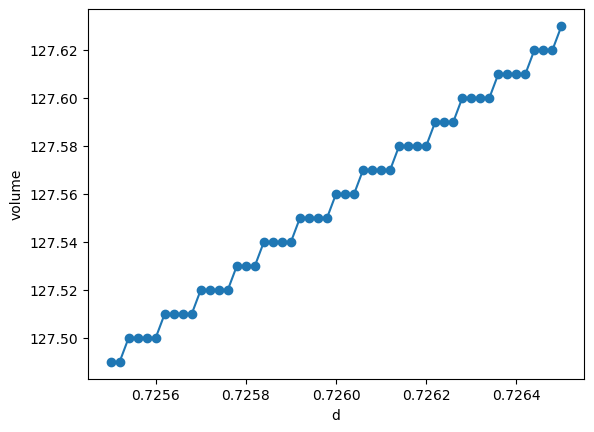

In [7]:
plt.plot(d2volume.keys(), d2volume.values())
plt.scatter(d2volume.keys(), d2volume.values())
plt.xlabel('d')
plt.ylabel('volume')

### Plot d v.s. n_sol (non-linear)
in wtTel22, we want fix n_sol = **3854**

In [11]:
!rm \#topol.top* \#{pdbid}*
d2n_sol = {}
for d in tqdm(np.linspace(0.720, 0.730, 51)):
    n_sol = get_n_sol(d)
    d2n_sol[np.round(d, decimals=15)] = n_sol

100%|███████████████████████████████████████████| 51/51 [00:43<00:00,  1.18it/s]


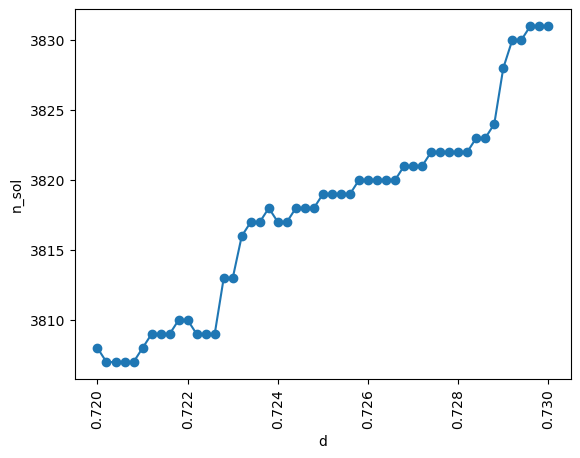

In [13]:
plt.plot(d2n_sol.keys(), d2n_sol.values())
plt.scatter(d2n_sol.keys(), d2n_sol.values())
plt.xlabel('d')
plt.ylabel('n_sol')
plt.xticks(rotation=90)
plt.show()

In [14]:
d2n_sol

{0.72: 3808,
 0.7202: 3807,
 0.7204: 3807,
 0.7206: 3807,
 0.7208: 3807,
 0.721: 3808,
 0.7212: 3809,
 0.7214: 3809,
 0.7216: 3809,
 0.7218: 3810,
 0.722: 3810,
 0.7222: 3809,
 0.7224: 3809,
 0.7226: 3809,
 0.7228: 3813,
 0.723: 3813,
 0.7232: 3816,
 0.7234: 3817,
 0.7236: 3817,
 0.7238: 3818,
 0.724: 3817,
 0.7242: 3817,
 0.7244: 3818,
 0.7246: 3818,
 0.7248: 3818,
 0.725: 3819,
 0.7252: 3819,
 0.7254: 3819,
 0.7256: 3819,
 0.7258: 3820,
 0.726: 3820,
 0.7262: 3820,
 0.7264: 3820,
 0.7266: 3820,
 0.7268: 3821,
 0.727: 3821,
 0.7272: 3821,
 0.7274: 3822,
 0.7276: 3822,
 0.7278: 3822,
 0.728: 3822,
 0.7282: 3822,
 0.7284: 3823,
 0.7286: 3823,
 0.7288: 3824,
 0.729: 3828,
 0.7292: 3830,
 0.7294: 3830,
 0.7296: 3831,
 0.7298: 3831,
 0.73: 3831}